# Transformers
This notebook will attempt to utilize the Time Series transformers found on HuggingFace.
- Model link: https://huggingface.co/docs/transformers/model_doc/time_series_transformer 
- Data: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_companies.csv

## First Steps


### Imports

In [43]:
from pathlib import Path
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

### Data and Configs

In [44]:
COMPANIES = Path("data/sp500_companies.csv").absolute()
INDEX = Path("data/sp500_index.csv").absolute()
STOCKS = Path("data/sp500_stocks.csv").absolute()
TRAIN_TEST_SPLIT: int = 0.8


#### Create train and test set

In [45]:
stock_df = pd.read_csv(INDEX)
stock_length = len(stock_df)
stock_df["Set"] = ["train" if i < TRAIN_TEST_SPLIT * len(stock_df) else "test" for i in range(len(stock_df))]
stock_df["Date"] = pd.to_datetime(stock_df["Date"])
stock_df["Year"] = stock_df["Date"].dt.year


        Date   S&P500    Set  Year
0 2012-12-03  1409.46  train  2012
1 2012-12-04  1407.05  train  2012
2 2012-12-05  1409.28  train  2012
3 2012-12-06  1413.94  train  2012
4 2012-12-07  1418.07  train  2012


#### Plotting S&P Stock Price

[Text(15677.0, 0, '2012-12-03'),
 Text(16041.0, 0, '2013-12-02'),
 Text(16405.0, 0, '2014-12-01'),
 Text(16769.0, 0, '2015-11-30'),
 Text(17133.0, 0, '2016-11-28'),
 Text(17497.0, 0, '2017-11-27'),
 Text(17861.0, 0, '2018-11-26'),
 Text(18225.0, 0, '2019-11-25'),
 Text(18589.0, 0, '2020-11-23'),
 Text(18953.0, 0, '2021-11-22'),
 Text(19317.0, 0, '2022-11-21')]

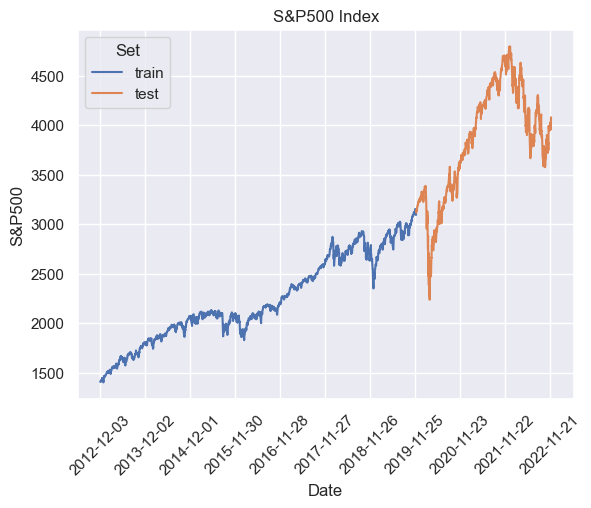

In [46]:
basic = sns.lineplot(data=stock_df, x="Date", y="S&P500", hue="Set")
basic.set_title("S&P500 Index")
basic.set_xticks(stock_df["Date"][::int(stock_length/10)])
basic.set_xticklabels(stock_df["Date"][::int(stock_length/10)].dt.strftime("%Y-%m-%d"), rotation=45)

In [49]:
import torch
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerModel

config = TimeSeriesTransformerConfig(prediction_length = len(stock_df["Set"] == "test"))
from huggingface_hub import hf_hub_download
file = hf_hub_download(
    repo_id="kashif/tourism-monthly-batch", filename="train-batch.pt", repo_type="dataset"
)
batch = torch.load(file)
print(batch)

{'static_categorical_features': tensor([[29],
        [31],
        [32],
        [32],
        [32],
        [33],
        [33],
        [34],
        [34],
        [35],
        [37],
        [39],
        [44],
        [46],
        [47],
        [47],
        [49],
        [50],
        [50],
        [51],
        [52],
        [53],
        [53],
        [54],
        [54],
        [56],
        [56],
        [59],
        [60],
        [62],
        [63],
        [66],
        [67],
        [67],
        [68],
        [70],
        [70],
        [71],
        [72],
        [73],
        [75],
        [76],
        [76],
        [77],
        [77],
        [78],
        [78],
        [79],
        [80],
        [81],
        [82],
        [83],
        [83],
        [84],
        [84],
        [85],
        [86],
        [86],
        [86],
        [87],
        [88],
        [90],
        [92],
        [93]]), 'static_real_features': tensor([[0.],
        [0.],
        [0.],
    